In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

### Kauffman Index Economic Activity Data

https://www.kauffman.org/kauffman-index/about/kiea-microdata

In [8]:
kieadata15 = pd.read_csv("./data/kieadata15.csv")

# kieadata15.head()

In [79]:
kieadata15 = kieadata15[['pid', 'grdatn','age','female','immigr',
           'msafp', 'natvty', 'race', 'region', 'state','yeart1', 'faminc']]

kieadata15.head()

,pid,grdatn,age,female,immigr,msafp,natvty,race,region,state,yeart1,faminc
0,15866200851 3111 11912,42,57,1,0,49340,57,1,1,14,2015,15
1,15866200851 3111 21912,39,26,0,0,49340,57,1,1,14,2015,15
2,17286201521 3011 11912,41,43,0,0,0,110,1,2,41,2015,12
3,17286201521 3011 21912,39,38,1,0,0,57,1,2,41,2015,12
4,43549100171 3011 11912,42,51,0,0,12060,57,1,3,58,2015,13


In [30]:
# kieadata15.region.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6AE49C908>,
      dtype=object)

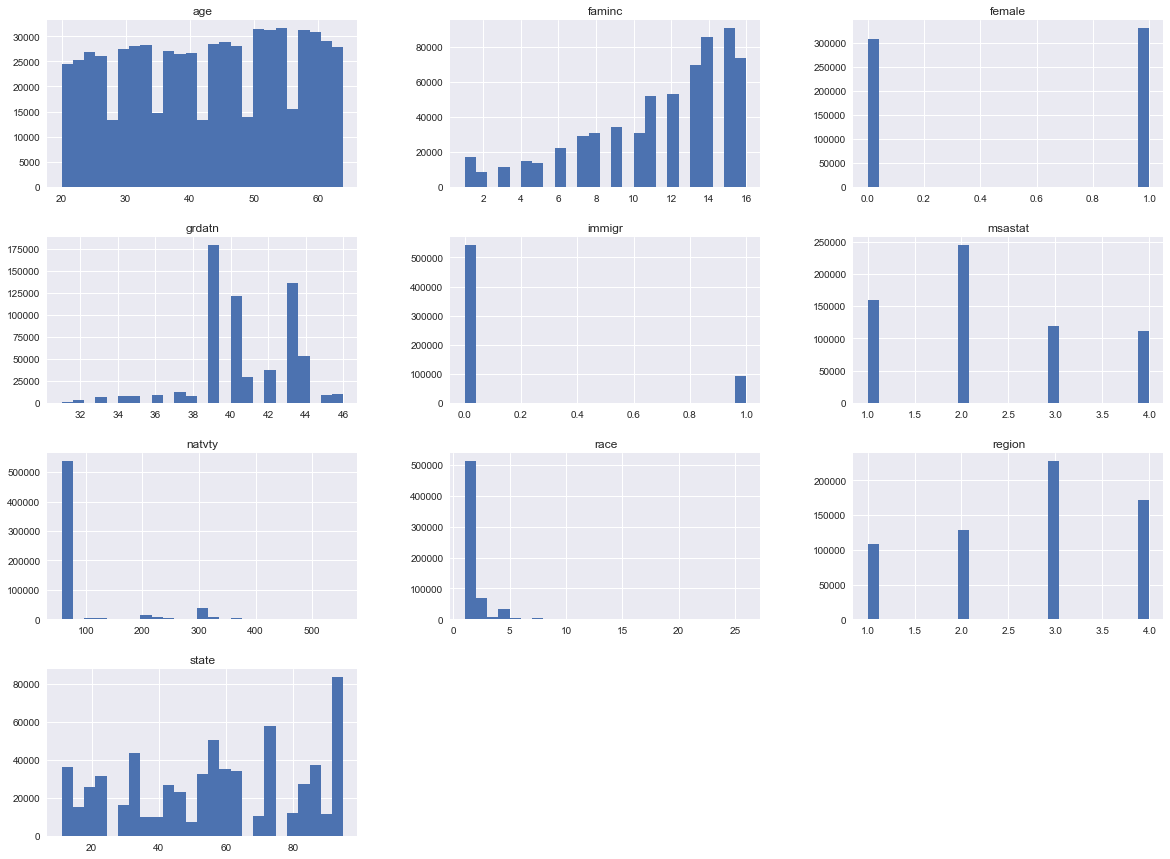

In [10]:
# A quick view of all the important features
fields = ['grdatn','age','female','immigr','msastat', 'natvty', 'race', 'region', 'state','faminc']
kieadata15[fields].hist(bins=25, figsize=(20,15))

In [11]:
kieadata15.isnull().sum()

pid        0
grdatn     0
age        0
female     0
immigr     0
msafp      0
msastat    0
natvty     0
race       0
region     0
state      0
year       0
yeart1     0
faminc     0
dtype: int64

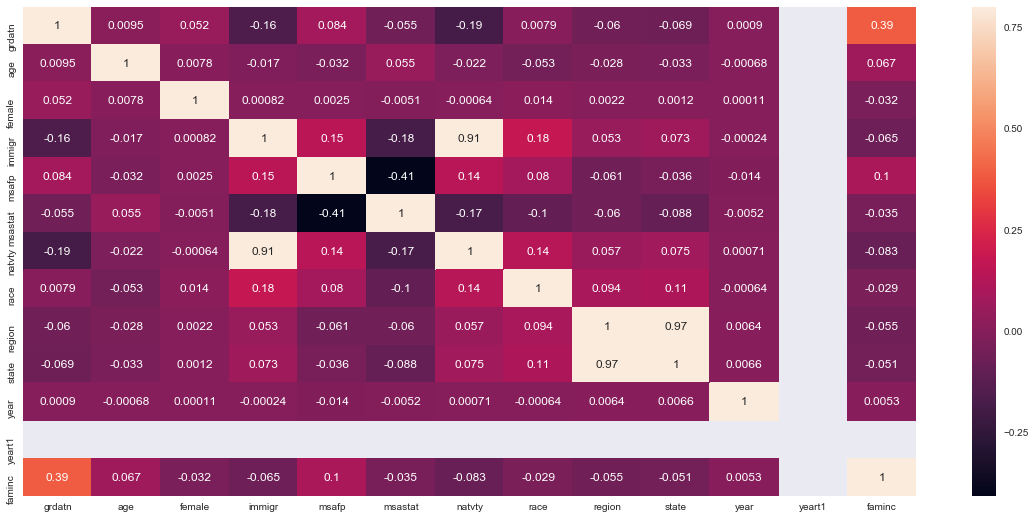

In [12]:
#correlation matrix
corrmat = kieadata15.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

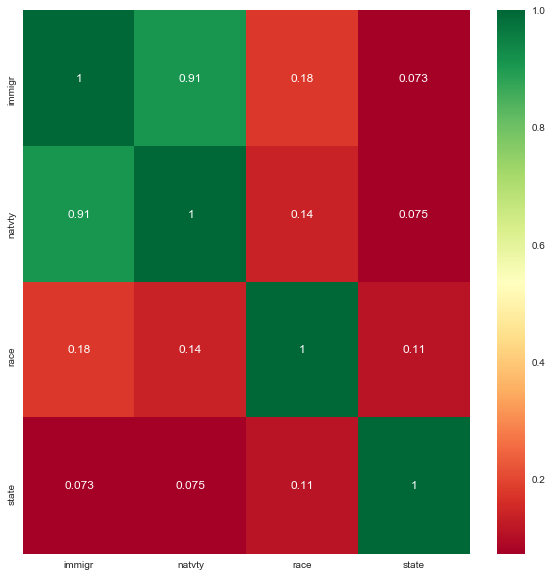

In [20]:
# most correlated features
corrmat = kieadata15.corr()
top_corr_features = corrmat.index[abs(corrmat["race"])>0.1]
plt.figure(figsize=(10,10))
g = sns.heatmap(kieadata15[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
state_list = pd.read_csv("./data/State_dict.csv")
state_list.head()

,state,name
0,11,Maine
1,12,New Hampshire
2,13,Vermont
3,14,Massachusetts
4,15,Rhode Island


In [53]:
state_dict = state_list.set_index('state')['name'].to_dict()

In [54]:
state_dict

{11: 'Maine',
 12: 'New Hampshire',
 13: 'Vermont',
 14: 'Massachusetts',
 15: 'Rhode Island',
 16: 'Connecticut',
 21: 'New York',
 22: 'New Jersey',
 23: 'Pennsylvania',
 31: 'Ohio',
 32: 'Indiana',
 33: 'Illinois',
 34: 'Michigan',
 35: 'Wisconsin',
 41: 'Minnesota',
 42: 'Iowa',
 43: 'Missouri',
 44: 'North Dakota',
 45: 'South Dakota',
 46: 'Nebraska',
 47: 'Kansas',
 51: 'Delaware',
 52: 'Maryland',
 53: 'Washington, D.C.',
 54: 'Virginia',
 55: 'West Virginia',
 56: 'North Carolina',
 57: 'South Carolina',
 58: 'Georgia',
 59: 'Florida',
 61: 'Kentucky',
 62: 'Tennessee',
 63: 'Alabama',
 64: 'Mississippi',
 71: 'Arkansas',
 72: 'Louisiana',
 73: 'Oklahoma',
 74: 'Texas',
 81: 'Montana',
 82: 'Idaho',
 83: 'Wyoming',
 84: 'Colorado',
 85: 'New Mexico',
 86: 'Arizona',
 87: 'Utah',
 88: 'Nevada',
 91: 'Washington',
 92: 'Oregon',
 93: 'California',
 94: 'Alaska',
 95: 'Hawaii'}

In [39]:
kieadata15.head()

,pid,grdatn,age,female,immigr,msafp,msastat,natvty,race,region,state,year,yeart1,faminc,state_names
0,15866200851 3111 11912,42,57,1,0,49340,2,57,1,1,14,2014,2015,15,NaN
1,15866200851 3111 21912,39,26,0,0,49340,2,57,1,1,14,2014,2015,15,NaN
2,17286201521 3011 11912,41,43,0,0,0,4,110,1,2,41,2014,2015,12,NaN
3,17286201521 3011 21912,39,38,1,0,0,4,57,1,2,41,2014,2015,12,NaN
4,43549100171 3011 11912,42,51,0,0,12060,2,57,1,3,58,2014,2015,13,NaN


In [55]:
kieadata15.state_names = kieadata15.state.map(state_dict)

In [56]:
kieadata15.head()

,pid,grdatn,age,female,immigr,msafp,msastat,natvty,race,region,state,year,yeart1,faminc,state_names
0,15866200851 3111 11912,42,57,1,0,49340,2,57,1,1,14,2014,2015,15,Massachusetts
1,15866200851 3111 21912,39,26,0,0,49340,2,57,1,1,14,2014,2015,15,Massachusetts
2,17286201521 3011 11912,41,43,0,0,0,4,110,1,2,41,2014,2015,12,Minnesota
3,17286201521 3011 21912,39,38,1,0,0,4,57,1,2,41,2014,2015,12,Minnesota
4,43549100171 3011 11912,42,51,0,0,12060,2,57,1,3,58,2014,2015,13,Georgia


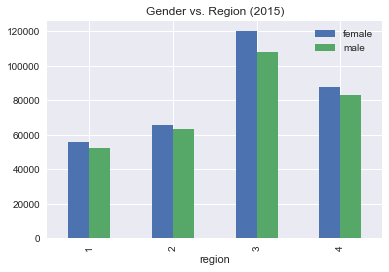

In [88]:
# Looking for correlations
female = kieadata15[kieadata15['female'] == True].groupby('region').size()
male = kieadata15[kieadata15['female'] == False].groupby('region').size()

data = pd.concat([female, male], axis=1)
data.columns = ['female', 'male']
data.plot.bar(title='Gender vs. Region (2015)')

In [90]:
female.sum()

329485

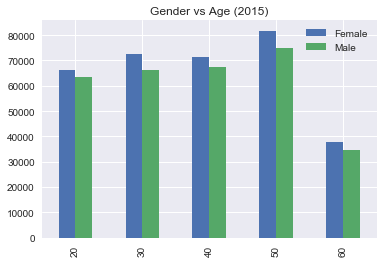

In [72]:
def f(age):  
    try:
        return int(age/10)*10
    except:
        pass
    
female = kieadata15[kieadata15['female'] == True].copy().set_index('age').groupby(f).size()
male = kieadata15[kieadata15['female'] == False].copy().set_index('age').groupby(f).size()
data = pd.concat([female, male], axis=1)
data.columns = ['Female', 'Male']
data.plot.bar(title='Gender vs Age (2015)')

In [66]:
# sns.barplot(kieadata15.age,kieadata15.faminc)

In [78]:
kieadata96 = pd.read_csv("./data/kieadata1996.csv")

kieadata96 = kieadata96[['pid', 'grdatn','age','female','immigr',
           'msafp', 'natvty', 'race', 'region', 'state','year','faminc']]

kieadata96.head()

,pid,grdatn,age,female,immigr,msafp,natvty,race,region,state,year,faminc
0,68138420610 1 1 1 1,43,27,0,0,3360,57,1,3,74,1996,10
1,68138420610 1 2 1 1,43,23,1,0,3360,57,1,3,74,1996,10
2,567099102899 1 1 1 1,43,43,0,0,4480,57,1,4,93,1996,14
3,567099102899 1 2 1 1,43,42,1,0,4480,57,1,4,93,1996,14
4,604270694297 1 1 1 1,44,35,1,0,5360,57,1,3,62,1996,12


In [82]:
# kieadata96.isnull().sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6A6A90B00>,
      dtype=object)

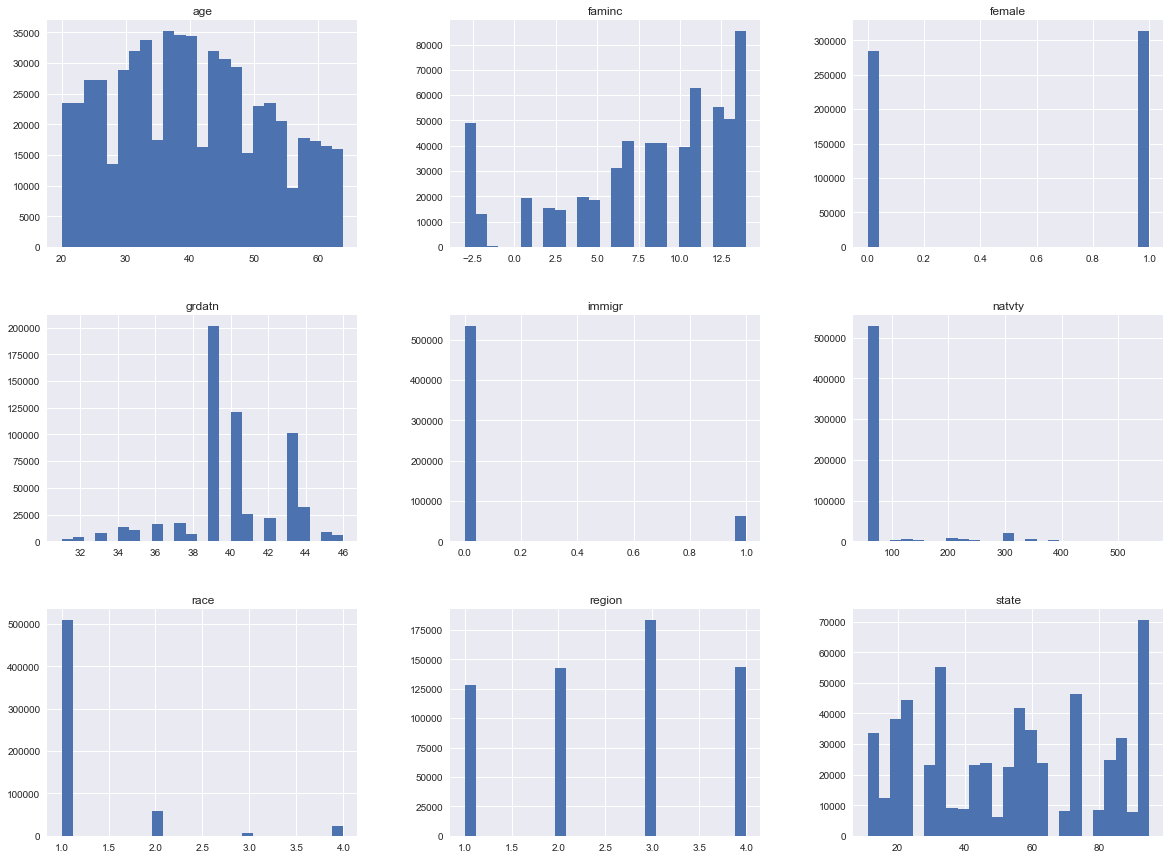

In [70]:
# A quick view of all the important features
fields = ['grdatn','age','female','immigr','natvty', 'race', 'region', 'state','faminc']
kieadata96[fields].hist(bins=25, figsize=(20,15))

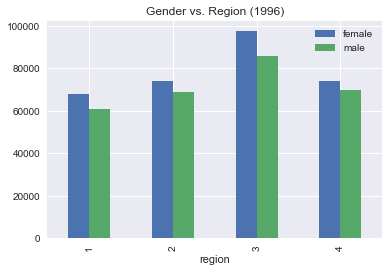

In [73]:
# Looking for correlations
female = kieadata96[kieadata96['female'] == True].groupby('region').size()
male = kieadata96[kieadata96['female'] == False].groupby('region').size()

data = pd.concat([female, male], axis=1)
data.columns = ['female', 'male']
data.plot.bar(title='Gender vs. Region (1996)')

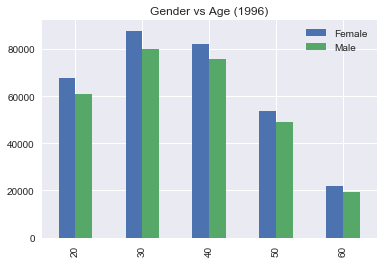

In [91]:
def f(age):  
    try:
        return int(age/10)*10
    except:
        pass
    
female = kieadata96[kieadata96['female'] == True].copy().set_index('age').groupby(f).size()
male = kieadata96[kieadata96['female'] == False].copy().set_index('age').groupby(f).size()
data = pd.concat([female, male], axis=1)
data.columns = ['Female', 'Male']
data.plot.bar(title='Gender vs Age (1996)')

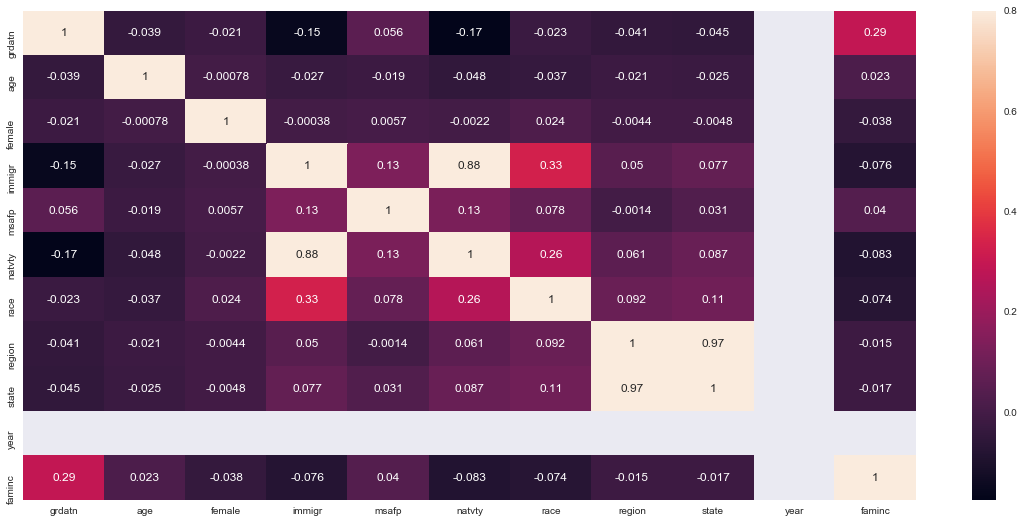

In [80]:
#correlation matrix
corrmat = kieadata96.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

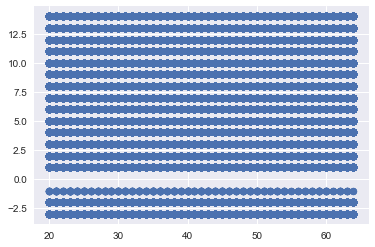

In [86]:
plt.scatter(kieadata96.age, kieadata96.faminc)
plt.show()

In [93]:
male.sum()

285014

In [94]:
female.sum()

313218

In [95]:
entrepreneurship = pd.read_csv("./data/Growth_Entrepreneurship.csv")
entrepreneurship.head()

,Location,Index Year,Breakdown,Characteristic,avgfsize_age5,avgfsize_base_age0,share_scale,start_growth,inc_year,h_g_density,...,z_hg_density,Rank,index_last_y,index_diff,index_diff_text,rank_last_y,rank_diff,norm_rate,norm_share,norm_hg_density
0,0,1982,NaN,NaN,12.97646,6.67602,NaN,0.94374,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.09366,NaN,NaN
1,0,1983,NaN,NaN,8.72510,5.39188,NaN,0.61819,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.84202,NaN,NaN
2,0,1984,NaN,NaN,9.38915,5.74664,NaN,0.63385,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.59572,NaN,NaN
3,0,1985,NaN,NaN,9.53576,5.54968,NaN,0.71825,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.43912,NaN,NaN
4,0,1986,NaN,NaN,11.88782,6.54249,NaN,0.81702,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.80745,NaN,NaN


In [97]:
entrepreneurship.isnull().sum()

Location                           0
Index Year                         0
Breakdown                       3005
Characteristic                  3005
avgfsize_age5                      0
avgfsize_base_age0                 0
share_scale                      455
start_growth                       0
inc_year                        2093
h_g_density                     2095
growth_index                    2995
Location_name                      0
location_category                  0
Category                          35
Location_web                       0
MetroAreaStates                 1685
MetroAreaMainCity               1685
year_BDS                           0
year_BDS_5yr                       0
Industry                        3005
Industry2                       3005
HighGrowthCompanyDensityRank    3005
HighGrowthCompanies             3005
share_scale_web                  455
ShareofHighGrowth               3005
z_rate                            25
z_share                          475
z

In [100]:
SBO = pd.read_csv("./data/SBO_2012_00CSA01_with_ann.csv")
SBO.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'NAICS.id',
       'NAICS.display-label', 'SEX.id', 'SEX.display-label', 'ETH_GROUP.id',
       'ETH_GROUP.display-label', 'RACE_GROUP.id', 'RACE_GROUP.display-label',
       'YEAR.id', 'FIRMALL', 'RCPALL', 'FIRMPDEMP', 'RCPPDEMP', 'EMP',
       'PAYANN', 'FIRMNOPD', 'RCPNOPD', 'FIRMALL_S', 'RCPALL_S', 'FIRMPDEMP_S',
       'RCPPDEMP_S', 'EMP_S', 'PAYANN_S', 'FIRMNOPD_S', 'RCPNOPD_S'],
      dtype='object')

In [102]:
# SBO.isnull().sum()

GEO.id                         0
GEO.id2                     2856
GEO.display-label              0
NAICS.id                       0
NAICS.display-label            0
SEX.id                         0
SEX.display-label              0
ETH_GROUP.id                   0
ETH_GROUP.display-label        0
RACE_GROUP.id                  0
RACE_GROUP.display-label       0
YEAR.id                        0
FIRMALL                        0
RCPALL                         0
FIRMPDEMP                      0
RCPPDEMP                       0
EMP                            0
PAYANN                         0
FIRMNOPD                       0
RCPNOPD                        0
FIRMALL_S                      0
RCPALL_S                       0
FIRMPDEMP_S                    0
RCPPDEMP_S                     0
EMP_S                          0
PAYANN_S                       0
FIRMNOPD_S                     0
RCPNOPD_S                      0
dtype: int64

In [132]:
SBO

,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
0,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,...,Number of firms without paid employees,"Sales, receipts, or value of shipments of firm...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of paid empl...,Relative standard error of annual payroll (%),Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or..."
1,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,00,...,22201902,1041586434,0.1,0.2,0.1,0.2,0.4,0.1,0.1,0.6
2,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,30,...,17101796,846365483,0.1,0.4,0.1,0.4,0.8,0.2,0.1,0.5
3,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,40,...,2475266,46751654,0.1,1.3,1.2,1.8,2.1,1.4,0.1,0.9
4,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,50,...,246740,7183960,0.5,6.7,2.3,8.8,3.8,5.4,0.4,1.6
5,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,60,...,1436876,71960023,0.2,0.7,0.4,0.9,1.3,1.1,0.3,1.6
6,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,61,...,239766,17369692,0.7,2.1,0.9,2.3,3.0,1.8,1.2,3.4
7,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,62,...,389685,19459412,0.6,2.3,1.2,2.8,2.0,2.6,0.8,2.5
8,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,63,...,168788,5384749,0.9,6.5,2.5,8.2,7.6,8.1,1.1,4.0
9,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,64,...,95257,4252556,1.0,2.9,3.1,3.7,2.8,2.5,1.2,6.5


In [125]:
SBO[SBO['SEX.display-label'] == 'Female-owned']

,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
51,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,00,...,8842742,229247857,0.1,0.6,0.2,0.7,0.8,0.7,0.1,0.6
52,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,30,...,6303834,178492696,0.1,0.6,0.3,0.7,0.9,0.7,0.1,0.9
53,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,40,...,1482886,20717275,0.1,2.5,1.9,4.9,4.6,5.6,0.1,1.5
54,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,50,...,123305,2328274,0.9,4.4,3.6,6.1,5.9,7.8,0.8,2.1
55,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,60,...,622869,22735025,0.5,2.0,1.0,2.7,5.3,2.3,0.5,2.6
56,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,61,...,67796,3500094,1.3,3.9,2.9,3.9,5.8,4.8,2.3,9.7
57,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,62,...,168487,6280733,1.0,5.8,3.0,6.9,4.8,5.6,1.2,2.7
58,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,63,...,87967,2360663,1.1,6.5,3.3,10.0,6.8,5.7,1.3,5.2
59,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,64,...,47211,1654259,1.1,8.9,9.2,11.8,13.3,12.4,1.7,14.6
60,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,65,...,65830,3044414,1.1,3.6,3.3,4.7,4.9,5.6,1.6,8.4


In [143]:
# SBO[SBO['SEX.display-label'] == 'Male-owned' & SBO['RACE_GROUP.display-label'] == 'White']

SBO[SBO['RACE_GROUP.display-label'] == 'White' ]

,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
2,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,30,...,17101796,846365483,0.1,0.4,0.1,0.4,0.8,0.2,0.1,0.5
25,0100000US,NaN,United States,00,Total for all sectors,001,All firms,020,Hispanic,30,...,1951294,63671187,0.2,1.5,1.1,1.9,1.4,1.8,0.1,1.0
36,0100000US,NaN,United States,00,Total for all sectors,001,All firms,028,Equally Hispanic/non-Hispanic,30,...,65448,4681138,1.5,6.2,2.7,7.4,5.6,4.3,1.8,5.4
43,0100000US,NaN,United States,00,Total for all sectors,001,All firms,029,Non-Hispanic,30,...,15085055,778013158,0.1,0.4,0.2,0.5,0.8,0.3,0.1,0.5
52,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,30,...,6303834,178492696,0.1,0.6,0.3,0.7,0.9,0.7,0.1,0.9
80,0100000US,NaN,United States,00,Total for all sectors,003,Male-owned,001,All firms,30,...,9347392,566904562,0.1,0.5,0.1,0.5,1.0,0.2,0.1,0.5
108,0100000US,NaN,United States,00,Total for all sectors,004,Equally male-/female-owned,001,All firms,30,...,1450569,100968225,0.4,1.0,0.6,1.1,1.3,0.6,0.6,1.7
138,0100000US,NaN,United States,11(606),"Agriculture, forestry, fishing and hunting(606)",001,All firms,001,All firms,30,...,211919,9310563,0.4,1.8,0.8,2.3,5.5,2.5,0.3,2.2
161,0100000US,NaN,United States,11(606),"Agriculture, forestry, fishing and hunting(606)",001,All firms,020,Hispanic,30,...,11601,323867,2.8,11.1,14.4,14.6,15.6,15.2,2.6,11.9
172,0100000US,NaN,United States,11(606),"Agriculture, forestry, fishing and hunting(606)",001,All firms,028,Equally Hispanic/non-Hispanic,30,...,665,43742,17.3,25.4,22.8,31.6,16.3,18.2,17.4,32.1


### Establishment Characteristics Data Tables

https://www.census.gov/ces/dataproducts/bds/data_estab.html

In [2]:
economy_wide = pd.read_csv("./data/Economy_Wide.csv")
economy_wide.head()

,year2,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,...,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp
0,1977,3417903,4153792,66091812,63987631,697749,17.1,526010,12.9,13919514,...,3909657,5801496,6.1,15.2,4208361,6.6,30.4,350748,352967,2224963
1,1978,3470239,4222683,69670352,67833282,626813,15.0,548965,13.1,14062357,...,4283093,6105123,6.3,15.3,3674141,5.4,30.6,360442,362456,2123414
2,1979,3598075,4376325,74016678,71830680,641788,14.9,471892,11.0,14443176,...,3639187,6431992,5.1,14.0,4371997,6.1,28.0,293251,294890,1667500
3,1980,3606457,4398753,74749924,74284989,580305,13.2,524356,12.0,12718175,...,3948087,7840218,5.3,15.9,929870,1.2,31.8,371483,373364,2123575
4,1981,3566572,4341224,73539034,73601473,577646,13.2,609342,14.0,12783982,...,5037764,7871097,6.8,17.5,-124879,-0.1,34.8,365741,367682,2132961


In [3]:
economy_wide.columns

Index(['year2', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp'],
      dtype='object')

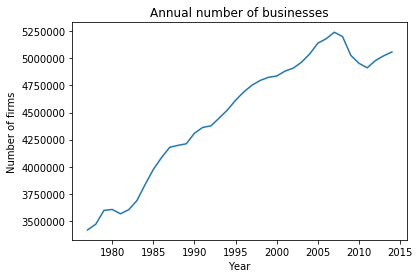

In [4]:
plt.plot(economy_wide.year2, economy_wide.firms)
plt.xlabel("Year")
plt.ylabel("Number of firms")
plt.title("Annual number of businesses")
plt.show()

### Business Dynamics Statistics
#### Firm Characteristics Data Tables
https://www.census.gov/ces/dataproducts/bds/data_firm.html

In [5]:
state = pd.read_csv("./data/State.csv")
state.tail(10)

,year2,state,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,d_flag,firmdeath_firms,firmdeath_estabs,firmdeath_emp
1928,2014,46,19063,23189,339014,335372,1881,8.1,1782,7.7,...,21904,3.1,9.7,7285,2.1,19.4,0,1237,1245,6960.0
1929,2014,47,87080,121014,2429351,2404197,10849,9.0,9572,8.0,...,185167,3.1,10.8,50309,2.0,21.6,0,6773,6789,40140.0
1930,2014,48,370629,503220,9728017,9588803,54930,11.1,42352,8.5,...,792510,4.1,12.4,278428,2.9,24.8,0,29434,29618,206041.0
1931,2014,49,51483,62972,1117111,1100704,7502,12.1,5932,9.5,...,91272,3.6,11.9,32815,2.9,23.8,0,3944,3949,23959.0
1932,2014,50,15838,18658,259772,257443,1544,8.3,1474,7.9,...,16858,2.9,9.4,4659,1.9,18.8,0,970,979,5274.0
1933,2014,51,132515,176856,3117342,3089692,16748,9.5,14495,8.2,...,259237,3.1,11.5,55299,1.8,23.0,0,9758,9812,48934.0
1934,2014,53,126327,157519,2448627,2408827,16724,10.7,13997,9.0,...,168511,3.5,10.5,79600,3.3,21.0,0,9494,9552,49150.0
1935,2014,54,25226,34280,568774,567485,2415,7.0,2751,8.0,...,44427,3.8,11.6,2578,0.5,23.2,0,1871,1884,10387.0
1936,2014,55,95287,124208,2426438,2403983,9666,7.8,8894,7.2,...,158049,2.7,9.3,44910,1.8,18.6,0,5960,6005,39250.0
1937,2014,56,15510,18322,212454,210856,1801,9.9,1597,8.8,...,19207,3.7,12.8,3197,1.5,25.6,0,1072,1074,4098.0


In [6]:
state[state.state == 50]

,year2,state,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,d_flag,firmdeath_firms,firmdeath_estabs,firmdeath_emp
45,1977,50,10485,11609,145067,139006,1914,16.9,1347,11.9,...,10387,6.3,13.8,12123,8.7,27.6,0,909,912,4669.0
96,1978,50,11078,12226,157550,151138,1913,16.1,1288,10.8,...,10856,8.1,15.3,12825,8.5,30.6,0,961,968,4973.0
147,1979,50,11344,12557,164309,160819,1753,14.1,1360,11.0,...,15077,5.1,14.5,6980,4.3,29.0,0,1040,1046,5397.0
198,1980,50,11514,12749,169599,166906,1652,13.1,1397,11.0,...,16324,4.3,14.1,5386,3.2,28.2,0,1056,1058,4549.0
249,1981,50,11049,12252,161839,161293,1531,12.4,1681,13.6,...,14641,5.8,14.9,1093,0.6,29.8,0,1057,1061,5075.0
300,1982,50,11298,12644,162510,162040,1891,15.2,1340,10.8,...,15961,5.6,15.4,940,0.6,30.8,0,790,803,4287.0
351,1983,50,11688,13024,161519,162155,1585,12.4,1325,10.3,...,17245,3.9,14.5,-1271,-0.8,27.4,0,902,904,3849.0
402,1984,50,12300,13680,172966,166945,2007,15.0,1327,9.9,...,10924,4.4,11.0,12043,7.2,22.0,0,899,901,4290.0
453,1985,50,13196,14589,189009,186234,2121,14.9,1463,10.3,...,14033,5.7,13.3,5551,2.9,26.6,0,974,975,4559.0
504,1986,50,13768,15239,200092,194338,2338,15.7,1623,10.9,...,14524,4.8,12.3,11508,5.9,24.6,0,1120,1120,5725.0


In [7]:
# extracting table of state codes from:
# https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm

from urllib.request import urlopen
from bs4 import BeautifulSoup as BS
import urllib.request

# url
url = "https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm"

#http request
request=urllib.request.Request(url)

#result of the request
result=urllib.request.urlopen(request)

#read & store the result
resulttext=result.read()

#create the BeautifulSoup object by passing read reseult to the BeautifulSoup
soup = BS(resulttext, 'html.parser')

# print the output
print(soup.prettify())

# scrape the table oject
table = soup.find("table")

# print the table
print(table)

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <meta content="Microsoft FrontPage 4.0" name="GENERATOR">
    <meta content="FrontPage.Editor.Document" name="ProgId">
     <title>
      State FIPS Code Listing
     </title>
    </meta>
   </meta>
  </meta>
 </head>
 <body>
  <p align="center">
   <br>
    <b>
     <font size="+3">
      State FIPS Code Listing
     </font>
    </b>
    <p align="center">
     <img border="0" height="172" src="images/state_6.gif" width="733">
      <hr>
       <h3 align="center">
        Click on the highlighted State abbreviation for a list of
Counties and County FIPS codes.
       </h3>
       <div align="center">
        <center>
         <table border="1" width="687">
          <tbody>
           <tr>
            <td align="center" width="85">
             <strong>
              State Abbreviation
             </strong>
            </td>
            <td align="center" width="46">
             <strong>
        

In [8]:
# create empty data df
data = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    cells = [ele.text.strip() for ele in cells]
    data.append(cells)
    eq_df = pd.DataFrame(data, columns=['abbr1','code1','name1','abbr2','code2','name2'])
    eq_df = eq_df.drop(0,0)

# confirm dataframe:

eq_df.head() 

,abbr1,code1,name1,abbr2,code2,name2
1,AK,02,ALASKA,MS,28,MISSISSIPPI
2,AL,01,ALABAMA,MT,30,MONTANA
3,AR,05,ARKANSAS,NC,37,NORTH CAROLINA
4,AS,60,AMERICAN SAMOA,ND,38,NORTH DAKOTA
5,AZ,04,ARIZONA,NE,31,NEBRASKA


In [9]:
eq_df.columns

Index(['abbr1', 'code1', 'name1', 'abbr2', 'code2', 'name2'], dtype='object')

In [10]:
eq_df1 = eq_df[['abbr1','code1', 'name1']]
eq_df2 = eq_df[['abbr2', 'code2', 'name2']]
eq_df1.columns = ['st_abbr','st_code', 'st_name']
eq_df2.columns = ['st_abbr','st_code', 'st_name']

In [11]:
df3 = pd.merge(eq_df1, eq_df2, on=['st_code','st_abbr','st_name'], how='outer')
df3

,st_abbr,st_code,st_name
0,AK,02,ALASKA
1,AL,01,ALABAMA
2,AR,05,ARKANSAS
3,AS,60,AMERICAN SAMOA
4,AZ,04,ARIZONA
5,CA,06,CALIFORNIA
6,CO,08,COLORADO
7,CT,09,CONNECTICUT
8,DC,11,DISTRICT OF COLUMBIA
9,DE,10,DELAWARE


Because the original webpage had the table in 2 columns with a gap at the index = 27, it needs to be dropped 

In [12]:
df3.shape

(56, 3)

In [13]:
# df3.iloc[27]
df4 = df3.drop(df3.index[27])
df4.shape

(55, 3)

In [14]:
df4.st_code = pd.to_numeric(df4.st_code, errors='coerce')
df4.dtypes

st_abbr    object
st_code     int64
st_name    object
dtype: object

In [15]:
state_code_dict = df4.set_index('st_code')['st_abbr'].to_dict()
state_code_dict 

{1: 'AL',
 2: 'AK',
 4: 'AZ',
 5: 'AR',
 6: 'CA',
 8: 'CO',
 9: 'CT',
 10: 'DE',
 11: 'DC',
 12: 'FL',
 13: 'GA',
 15: 'HI',
 16: 'ID',
 17: 'IL',
 18: 'IN',
 19: 'IA',
 20: 'KS',
 21: 'KY',
 22: 'LA',
 23: 'ME',
 24: 'MD',
 25: 'MA',
 26: 'MI',
 27: 'MN',
 28: 'MS',
 29: 'MO',
 30: 'MT',
 31: 'NE',
 32: 'NV',
 33: 'NH',
 34: 'NJ',
 35: 'NM',
 36: 'NY',
 37: 'NC',
 38: 'ND',
 39: 'OH',
 40: 'OK',
 41: 'OR',
 42: 'PA',
 44: 'RI',
 45: 'SC',
 46: 'SD',
 47: 'TN',
 48: 'TX',
 49: 'UT',
 50: 'VT',
 51: 'VA',
 53: 'WA',
 54: 'WV',
 55: 'WI',
 56: 'WY',
 60: 'AS',
 66: 'GU',
 72: 'PR',
 78: 'VI'}

In [16]:
state['state_names'] = state['state'].map(state_code_dict)

In [17]:
TN = state[state.state_names == 'TN']
TN

,year2,state,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,d_flag,firmdeath_firms,firmdeath_estabs,firmdeath_emp,state_names
42,1977,47,65615,78338,1313122,1273560,13760,17.9,10117,13.2,...,5.8,14.8,79124,6.2,29.6,0,6941,6971,44016.0,TN
93,1978,47,67459,80407,1386606,1350566,12067,15.2,9967,12.6,...,5.8,14.8,72080,5.3,29.6,0,6950,6972,38450.0,TN
144,1979,47,68306,81771,1457872,1421203,11986,14.8,10104,12.5,...,5.1,14.2,73338,5.1,28.4,0,7187,7199,38245.0,TN
195,1980,47,68649,82403,1435366,1445831,11109,13.5,10164,12.4,...,5.3,17.0,-20929,-1.4,31.2,0,7236,7251,39818.0,TN
246,1981,47,66187,79665,1399646,1403176,10105,12.5,11619,14.4,...,6.4,16.6,-7059,-0.5,32.2,0,7416,7445,41705.0,TN
297,1982,47,66172,81133,1390208,1394634,12316,15.3,9901,12.3,...,5.1,17.1,-8853,-0.7,32.8,0,5818,5825,34291.0,TN
348,1983,47,68003,82972,1402283,1390395,10688,13.0,9477,11.6,...,5.0,16.0,23776,1.7,32.0,0,6328,6359,36869.0,TN
399,1984,47,71061,86278,1489669,1448024,13068,15.4,9755,11.5,...,5.0,13.6,83291,5.8,27.2,0,6436,6470,35131.0,TN
450,1985,47,73597,89144,1571221,1541644,12390,14.1,9892,11.3,...,5.3,13.5,59155,3.8,27.0,0,6499,6551,36716.0,TN
501,1986,47,75788,91817,1637750,1603062,13070,14.4,10013,11.1,...,5.5,14.3,69376,4.4,28.6,0,6690,6703,47135.0,TN


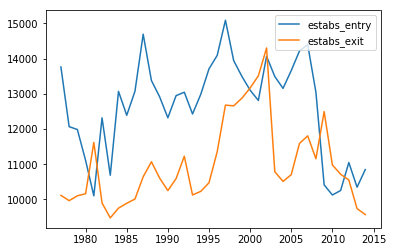

In [28]:
plt.plot(TN.year2, TN['estabs_entry'])
plt.plot(TN.year2, TN['estabs_exit'])
plt.legend()
plt.show()

In [19]:
TN.columns

Index(['year2', 'state', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'd_flag', 'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp',
       'state_names'],
      dtype='object')

#### Looking into global data

In [32]:
share_of_women_inventors = pd.read_csv("data/GENDER_ENT1_29062018020347129.csv", 
                                       usecols=['LOCATION','Country', 'Time', 'Value'])
share_of_women_inventors.head()

,LOCATION,Country,Time,Value
0,NLD,Netherlands,2000,7.11584
1,NLD,Netherlands,2001,7.30398
2,NLD,Netherlands,2002,7.20783
3,NLD,Netherlands,2003,7.17771
4,NLD,Netherlands,2004,7.08478


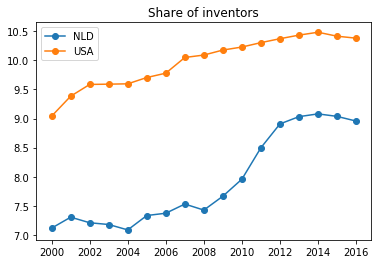

In [160]:
NLD_inv = share_of_women_inventors[share_of_women_inventors.LOCATION == 'NLD']
USA_inv = share_of_women_inventors[share_of_women_inventors.LOCATION == 'USA']
_ = plt.plot(NLD_inv.Time, NLD_inv.Value, '-o',label="NLD")
_ = plt.plot(USA_inv.Time, USA_inv.Value, '-o',label = "USA")
plt.legend()
plt.title("Share of inventors")
plt.show()

In [57]:
Share_of_population_with_account_in_a_financial_institution = pd.read_csv("data/GENDER_ENT1_29062018022417846.csv", usecols=
                                                                         ['LOCATION','Country','Sex','Time','Value'])
Share_of_population_with_account_in_a_financial_institution.head()

,LOCATION,Country,Sex,Time,Value
0,AUS,Australia,Men,2011,99.595
1,AUS,Australia,Men,2014,98.671
2,AUS,Australia,Women,2011,98.592
3,AUS,Australia,Women,2014,99.036
4,AUT,Austria,Men,2011,97.737


In [59]:
NLD_Ac = Share_of_population_with_account_in_a_financial_institution[Share_of_population_with_account_in_a_financial_institution['LOCATION']=='NLD']
USA_Ac = Share_of_population_with_account_in_a_financial_institution[Share_of_population_with_account_in_a_financial_institution['LOCATION']=='USA']

In [61]:
USA_Ac

,LOCATION,Country,Sex,Time,Value
100,USA,United States,Men,2011,91.982
101,USA,United States,Men,2014,92.361
102,USA,United States,Women,2011,84.069
103,USA,United States,Women,2014,94.798


#### Self-employed without employees

https://data.oecd.org/entrepreneur/self-employed-without-employees.htm

Those who are self-employed without employees are people whose primary activity is self-employment and do not employ others. 

In [133]:
df_sewoe = pd.read_csv("data/DP_LIVE_29062018030723133.csv", 
                                         usecols=['LOCATION','SUBJECT','TIME','Value'])
df_sewoe.head(20)

,LOCATION,SUBJECT,TIME,Value
0,AUS,MEN,2013,12.545690
1,AUS,MEN,2014,12.810710
2,AUS,MEN,2015,12.908300
3,AUS,MEN,2016,12.824260
4,AUS,MEN,2017,12.684900
5,AUS,WOMEN,2013,7.643921
6,AUS,WOMEN,2014,8.009437
7,AUS,WOMEN,2015,7.964472
8,AUS,WOMEN,2016,8.138488
9,AUS,WOMEN,2017,8.148689


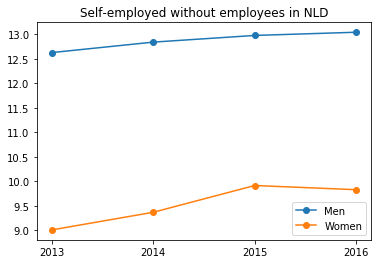

In [159]:
NLD_sewoe_men = df_sewoe[(df_sewoe.LOCATION == 'NLD') & (df_sewoe.SUBJECT == 'MEN')]
NLD_sewoe_women = df_sewoe[(df_sewoe.LOCATION == 'NLD') & (df_sewoe.SUBJECT != 'MEN')]

men = plt.plot(NLD_sewoe_men.TIME, NLD_sewoe_men.Value, '-o',label='Men')
women = plt.plot(NLD_sewoe_women.TIME, NLD_sewoe_women.Value, '-o',label='Women')

plt.legend()
plt.title("Self-employed without employees in NLD")

x = [2013, 2014, 2015, 2016]
plt.xticks(x)

plt.show()

#### Self-employed with employees

https://data.oecd.org/entrepreneur/self-employed-with-employees.htm#indicator-chart

Those who are self-employed with employees are people whose primary activity is self-employment and who employ others. 

In [121]:
df_sewe = pd.read_csv("data/DP_LIVE_30062018163039939.csv", 
                                         usecols=['LOCATION','SUBJECT','TIME','Value'])
df_sewe.dtypes

LOCATION     object
SUBJECT      object
TIME          int64
Value       float64
dtype: object

In [129]:
df_sewe.head(30)

,LOCATION,SUBJECT,TIME,Value
0,AUS,MEN,1991,9.026331
1,AUS,MEN,1992,8.799062
2,AUS,MEN,1993,8.768209
3,AUS,MEN,1994,8.980591
4,AUS,MEN,1995,9.063630
5,AUS,MEN,1996,8.833968
6,AUS,MEN,1997,8.960256
7,AUS,MEN,1998,9.123059
8,AUS,MEN,1999,8.958220
9,AUS,MEN,2000,9.292164


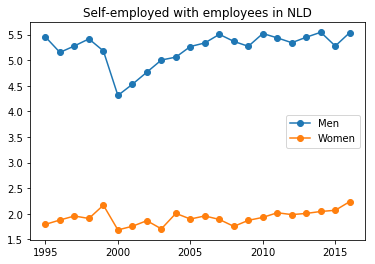

In [158]:
NLD_sewe_men = df_sewe[(df_sewe.LOCATION == 'NLD') & (df_sewe.SUBJECT == 'MEN')]
NLD_sewe_women = df_sewe[(df_sewe.LOCATION == 'NLD') & (df_sewe.SUBJECT != 'MEN')]

men = plt.plot(NLD_sewe_men.TIME, NLD_sewe_men.Value, '-o',label='Men')
women = plt.plot(NLD_sewe_women.TIME, NLD_sewe_women.Value, '-o',label='Women')

plt.legend()
plt.title("Self-employed with employees in NLD")



plt.show()

#### Share of self-employed in the population of employed with foreign-citizenship, by sex
http://www.oecd.org/gender/data/entrepreneurship/#d.en.387805

In [145]:
df_immigrants = pd.read_csv("data/GENDER_ENT1_30062018165109135.csv", 
                           usecols=['LOCATION', 'Country', 'Sex', 'Time', 'Value'])
df_immigrants.head()

,LOCATION,Country,Sex,Time,Value
0,EST,Estonia,Women,2000,0.0
1,EST,Estonia,Women,2001,0.0
2,EST,Estonia,Women,2002,0.0
3,EST,Estonia,Women,2003,0.0
4,EST,Estonia,Women,2004,0.0


In [150]:
USA_immigrant = df_immigrants[df_immigrants.LOCATION == 'USA']
USA_immigrant

,LOCATION,Country,Sex,Time,Value
718,USA,United States,Women,2013,8.923826
719,USA,United States,Women,2014,8.139024
720,USA,United States,Women,2015,7.887560
721,USA,United States,Women,2016,7.971888
734,USA,United States,Men,2013,10.062810
735,USA,United States,Men,2014,10.638830
736,USA,United States,Men,2015,11.241530
737,USA,United States,Men,2016,11.116360


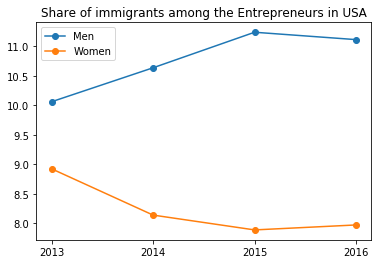

In [161]:
USA_immigrant_Men = USA_immigrant[USA_immigrant.Sex == 'Men']
USA_immigrant_Women = USA_immigrant[USA_immigrant.Sex == 'Women']

_ = plt.plot(USA_immigrant_Men.Time, USA_immigrant_Men.Value, '-o',label = 'Men')
_ = plt.plot(USA_immigrant_Women.Time,  USA_immigrant_Women.Value ,'-o', label = 'Women')      
plt.legend()
x = [2013, 2014, 2015, 2016]
plt.title("Share of immigrants among the Entrepreneurs in USA")
plt.xticks(x)
plt.show()